<a href="https://colab.research.google.com/github/MohmedAAK/-Advanced-computer-vision-v1/blob/main/Advanced%20computer%20vision/team1/challenges/kaggle_dataset_to_colab_CAT_DOG_CHALLANGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#download data - mchine learning mastry

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 32.5MB/s]
 99% 539M/543M [00:09<00:00, 44.5MB/s]
100% 543M/543M [00:10<00:00, 56.3MB/s]
 99% 269M/271M [00:06<00:00, 33.8MB/s]
100% 271M/271M [00:06<00:00, 43.0MB/s]


In [ ]:
#!unzip /content/test1.zip 
#print("")

In [ ]:
!unzip /content/train.zip 
from IPython.display import clear_output
clear_output()

In [ ]:
import os
os.makedirs("test", exist_ok=False)
os.makedirs("train/dog", exist_ok=False)
os.makedirs("train/cat", exist_ok=False)
os.makedirs("test/dog", exist_ok=False)
os.makedirs("test/cat", exist_ok=False)

In [ ]:
import glob
import shutil
def mover(from_p,to_p,percentage):
  counter=0
  for file_ in glob.glob(from_p+"/*.jpg"):
    counter+=1 
  print(counter)   
  move=0
  for file_ in glob.glob(from_p+"/*.jpg"):  
    if move/counter<=percentage: 
      shutil.move(file_,to_p+"/"+file_.split("/")[-1])
      move+=1
  print(move)  
def split_dog_cat(path):
  for file_ in glob.glob(path+"/*.jpg"):  
    if "dog" in file_ or "DOG" in file_:
      shutil.move(file_,path+"/dog/"+file_.split("/")[-1])
    else:
      shutil.move(file_,path+"/cat/"+file_.split("/")[-1])


In [ ]:
split_dog_cat("/content/train")

In [ ]:
mover("/content/train/cat","/content/test/cat",0.2)
mover("/content/train/dog","/content/test/dog",0.2)

12500
2501
12500
2501
9999
2000
9999
2000


#machine learning mastry_example

In [ ]:
#The full code listing of the VGG model for transfer learning on the dogs vs. cats dataset 
# vgg16 model used for transfer learning on the dogs and cats dataset
import sys
from matplotlib import pyplot
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('/content/train',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('/content/test',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()



```
# This is formatted as code
```

#download data

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 27.1MB/s]
 97% 528M/543M [00:05<00:00, 160MB/s]
100% 543M/543M [00:05<00:00, 110MB/s]
 97% 263M/271M [00:04<00:00, 75.3MB/s]
100% 271M/271M [00:04<00:00, 68.1MB/s]


In [6]:
#!unzip /content/test1.zip 
#print("")

In [7]:
!unzip /content/train.zip 
from IPython.display import clear_output
clear_output()

In [8]:
import os
os.makedirs("val", exist_ok=False)
os.makedirs("test", exist_ok=False)
os.makedirs("val/dog", exist_ok=False)
os.makedirs("val/cat", exist_ok=False)
os.makedirs("train/dog", exist_ok=False)
os.makedirs("train/cat", exist_ok=False)
os.makedirs("test/dog", exist_ok=False)
os.makedirs("test/cat", exist_ok=False)

In [9]:
import glob
import shutil
def mover(from_p,to_p,percentage):
  counter=0
  for file_ in glob.glob(from_p+"/*.jpg"):
    counter+=1 
  print(counter)   
  move=0
  for file_ in glob.glob(from_p+"/*.jpg"):  
    if move/counter<=percentage: 
      shutil.move(file_,to_p+"/"+file_.split("/")[-1])
      move+=1
  print(move)  
def split_dog_cat(path):
  for file_ in glob.glob(path+"/*.jpg"):  
    if "dog" in file_ or "DOG" in file_:
      shutil.move(file_,path+"/dog/"+file_.split("/")[-1])
    else:
      shutil.move(file_,path+"/cat/"+file_.split("/")[-1])


In [10]:
split_dog_cat("/content/train")

In [11]:
mover("/content/train/cat","/content/test/cat",0.2)
mover("/content/train/dog","/content/test/dog",0.2)
mover("/content/train/cat","/content/val/cat",0.2)
mover("/content/train/dog","/content/val/dog",0.2)

12500
2501
12500
2501
9999
2000
9999
2000


In [12]:
"/content/fold/file_.jpg".split("/")[-1]

'file_.jpg'

In [13]:
import keras,os
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#simple model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))# kernel_initializer='he_uniform', padding='same',
	#model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	#model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(2, activation='softmax'))
	# compile model
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

input_path = '/content/'


#too simple model 1 with Standardize

In [ ]:
model = define_model()

# create data generator
#(tensor([0.6318, 0.5199, 0.4509]), tensor([0.2580, 0.2405, 0.2438]))
datagen = ImageDataGenerator( featurewise_center=True,featurewise_std_normalization=True)

# specify imagenet mean values for centering

datagen.mean = [0.485*255, 0.456*255, 0.406*255]#[0.6318*255, 0.5199*255, 0.4509*255]   
datagen.std = 0.226*255
# create data generator
# prepare iterators
train = datagen.flow_from_directory(input_path+'train/',class_mode="categorical", batch_size=18, target_size=(224, 224))
val = datagen.flow_from_directory(input_path+'val/',class_mode="categorical", batch_size=18, target_size=(224, 224))
test= datagen.flow_from_directory(input_path+'test/',class_mode="categorical", batch_size=16, target_size=(224, 224))

history = model.fit_generator(train,validation_data=val, epochs=5)#steps_per_epoch=2535,  #, verbose=0
# evaluate model
_, acc = model.evaluate_generator(test)#steps=299, , verbose=0

#loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)

print('> %.3f' % (acc * 100))





Found 15998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


889/889 [==============================] - 438s 492ms/step - loss: 3.1434 - accuracy: 0.6242 - val_loss: 0.8351 - val_accuracy: 0.6645
Epoch 2/5
889/889 [==============================] - 436s 491ms/step - loss: 0.3297 - accuracy: 0.8780 - val_loss: 0.8712 - val_accuracy: 0.6835
Epoch 3/5
889/889 [==============================] - 437s 491ms/step - loss: 0.1373 - accuracy: 0.9607 - val_loss: 1.1307 - val_accuracy: 0.6693
Epoch 4/5
889/889 [==============================] - 436s 491ms/step - loss: 0.3516 - accuracy: 0.9226 - val_loss: 1.3738 - val_accuracy: 0.6700
Epoch 5/5
889/889 [==============================] - 436s 491ms/step - loss: 0.1345 - accuracy: 0.9639 - val_loss: 1.4667 - val_accuracy: 0.6697


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 6.779


In [ ]:
y_pre=model.predict_generator(test)
pre=[]
for i in y_pre:
    listss=list(i)
    max_value = max(listss)
    max_index = listss.index(max_value)
    pre.append(max_index)
y_true=test.classes
#print(pre)
#print(y_true)
from sklearn.metrics import classification_report
print(classification_report(y_true,pre))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

           0       0.50      0.52      0.51      2501
           1       0.50      0.47      0.48      2501

    accuracy                           0.50      5002
   macro avg       0.50      0.50      0.50      5002
weighted avg       0.50      0.50      0.50      5002



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


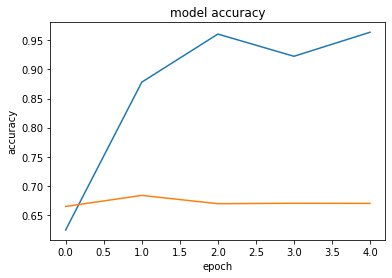

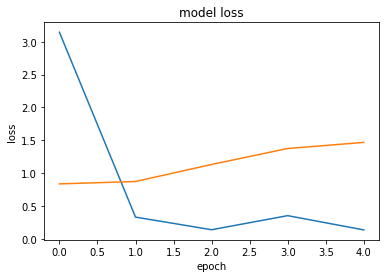

In [ ]:

from matplotlib import pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
#plt.plot(history.history['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.plot(history.history['test_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

#too simple model 1 with Normalize

In [ ]:
model = define_model()
input_path = '/content/'
# create data generator
#(tensor([0.6318, 0.5199, 0.4509]), tensor([0.2580, 0.2405, 0.2438]))
datagen = ImageDataGenerator(rescale=1.0/255.0)


train = datagen.flow_from_directory(input_path+'train/',class_mode="categorical", batch_size=18, target_size=(224, 224))
val = datagen.flow_from_directory(input_path+'val/',class_mode="categorical", batch_size=18, target_size=(224, 224))
test= datagen.flow_from_directory(input_path+'test/',class_mode="categorical", batch_size=16, target_size=(224, 224))

history = model.fit_generator(train,validation_data=val, epochs=5)#steps_per_epoch=2535,  #, verbose=0
# evaluate model
_, acc = model.evaluate_generator(test)#steps=299, , verbose=0

#loss, accuracy, f1_score, precision, recall = model.evaluate(Xtest, ytest, verbose=0)

print('> %.3f' % (acc * 100))





Found 15998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


889/889 [==============================] - 423s 475ms/step - loss: 1.4781 - accuracy: 0.6066 - val_loss: 0.6342 - val_accuracy: 0.6465
Epoch 2/5
889/889 [==============================] - 421s 473ms/step - loss: 0.4815 - accuracy: 0.7757 - val_loss: 0.6652 - val_accuracy: 0.6647
Epoch 3/5
889/889 [==============================] - 420s 473ms/step - loss: 0.2378 - accuracy: 0.9115 - val_loss: 0.8264 - val_accuracy: 0.6582
Epoch 4/5
889/889 [==============================] - 421s 473ms/step - loss: 0.1222 - accuracy: 0.9694 - val_loss: 0.9856 - val_accuracy: 0.6693
Epoch 5/5
889/889 [==============================] - 421s 473ms/step - loss: 0.0640 - accuracy: 0.9856 - val_loss: 1.2090 - val_accuracy: 0.6392


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 64.734


In [ ]:
y_pre=model.predict_generator(test)
pre=[]
for i in y_pre:
    listss=list(i)
    max_value = max(listss)
    max_index = listss.index(max_value)
    pre.append(max_index)
y_true=test.classes
#print(pre)
#print(y_true)
from sklearn.metrics import classification_report
print(classification_report(y_true,pre))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


              precision    recall  f1-score   support

           0       0.50      0.53      0.51      2501
           1       0.50      0.48      0.49      2501

    accuracy                           0.50      5002
   macro avg       0.50      0.50      0.50      5002
weighted avg       0.50      0.50      0.50      5002



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


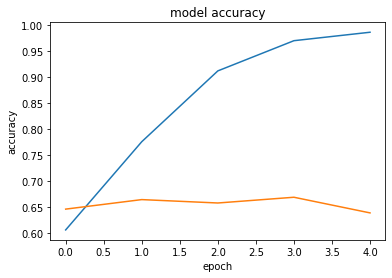

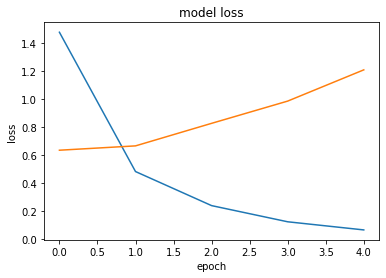

In [ ]:

from matplotlib import pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
#plt.plot(history.history['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.plot(history.history['test_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Example when the convolution with strides is better than pooling
The first layer in the ResNet uses convolution with strides. This is a great example of when striding gives you an advantage. This layer by itself significantly reduces the amount of computation that has to be done by the network in the subsequent layers. It compresses multiple 3x3 convolution (3 to be exact) in to one 7x7 convolution, to make sure that it has exactly the same receptive field as 3 convolution layers (even though it is less powerful in terms of what it can learn). At the same time this layer applies stride=2 that downsamples the image. Because this first layer in ResNet does convolution and downsampling at the same time, the operation becomes significantly cheaper computationally. If you use stride=1 and pooling for downsampling, then you will end up with convolution that does 4 times more computation + extra computation for the next pooling layer. The same trick was used in SqueezeNet and some other neural network architectures.

#Example where pooling is better than convolution
In the NIPS 2018, there was a new architecture presented called FishNet. One thing that they try is to fix the problems with the residual connections used in the ResNet. In the ResNet, in few places, they put 1x1 convolution in the skip connection when downsampling was applied to the image. This convolution layer makes gradient propagation harder. One of the major changes in their paper is that they get rid of the convolutions in the residual connections and replaced them with pooling and simple upscales/identities/concatenations. This solution fixes problem with gradient propagation in very deep networks.
#'Striving for simplicity: The all convolutional net' https://arxiv.org/pdf/1412.6806.pdf. Quote from the paper:

'We find that max-pooling can simply be replaced by a convolutional layer with increased stride without loss in accuracy on several image recognition benchmarks'

# RESNET 50 without loading the weights /0.898

In [ ]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model,load_model
#from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 2,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
datagen = ImageDataGenerator( featurewise_center=True,featurewise_std_normalization=True)

# specify imagenet mean values for centering

datagen.mean = [0.485*255, 0.456*255, 0.406*255]#[0.6318*255, 0.5199*255, 0.4509*255]   
datagen.std = 0.226*255
# create data generator
# prepare iterators
train = datagen.flow_from_directory(input_path+'train/',class_mode="categorical", batch_size=18, target_size=(224, 224))
val = datagen.flow_from_directory(input_path+'val/',class_mode="categorical", batch_size=18, target_size=(224, 224))
test= datagen.flow_from_directory(input_path+'test/',class_mode="categorical", batch_size=16, target_size=(224, 224))

Found 15998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.


In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max',save_best_only=True)
history = model.fit_generator(train,validation_data=val,epochs=15,callbacks=[mc,es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/15
889/889 [==============================] - ETA: 0s - loss: 1.1313 - accuracy: 0.5598

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


889/889 [==============================] - 489s 507ms/step - loss: 1.1313 - accuracy: 0.5598 - val_loss: 0.6905 - val_accuracy: 0.6025
Epoch 2/15
889/889 [==============================] - 448s 504ms/step - loss: 0.6211 - accuracy: 0.6505 - val_loss: 0.5659 - val_accuracy: 0.7072
Epoch 3/15
889/889 [==============================] - 448s 504ms/step - loss: 0.5685 - accuracy: 0.7020 - val_loss: 1.2116 - val_accuracy: 0.6628
Epoch 4/15
889/889 [==============================] - 448s 504ms/step - loss: 0.5301 - accuracy: 0.7347 - val_loss: 1.4980 - val_accuracy: 0.6248
Epoch 5/15
889/889 [==============================] - 449s 505ms/step - loss: 0.4963 - accuracy: 0.7604 - val_loss: 0.5638 - val_accuracy: 0.7395
Epoch 6/15
889/889 [==============================] - 447s 503ms/step - loss: 0.4416 - accuracy: 0.7985 - val_loss: 0.5551 - val_accuracy: 0.7368
Epoch 7/15
889/889 [==============================] - 448s 504ms/step - loss: 0.4009 - accuracy: 0.8175 - val_loss: 0.6413 - val_accura

In [ ]:
model.load_weights("best_model.h5")
model.evaluate_generator(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.261730819940567, 0.8988404870033264]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


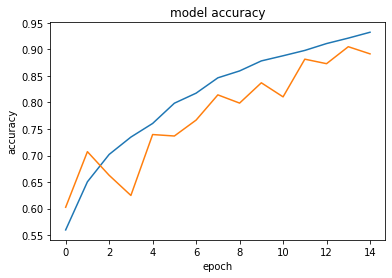

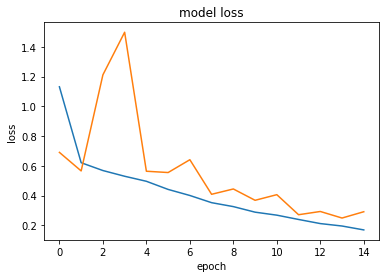

In [ ]:
from matplotlib import pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
#plt.plot(history.history['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.plot(history.history['test_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

# RESNET 50 transfer learning, fine_tuning / 0.826

In [ ]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model,load_model
#from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 2,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
#download model
import requests
#https://drive.google.com/uc?export=download&id=1n7rGZsAvwr6Le-IEHWBgA7ihz3pZA1DE
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)
    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)
    save_response_content(response, destination)    
def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value
    return None
def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
class_m=0   
plus=True               
file_id = '1n7rGZsAvwr6Le-IEHWBgA7ihz3pZA1DE'
destination = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
download_file_from_google_drive(file_id, destination)  


In [ ]:
#Load the pre-trained weights of the model
base_model.load_weights("/content/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)

In [ ]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fa21f2cca10> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fa21f2cc410> False
<keras.layers.convolutional.Conv2D object at 0x7fa21cd6a450> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa21f2585d0> False
<keras.layers.core.activation.Activation object at 0x7fa318115410> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa38cab5c90> False
<keras.layers.convolutional.Conv2D object at 0x7fa21f2a9a90> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa21f2c49d0> False
<keras.layers.core.activation.Activation object at 0x7fa294704d50> False
<keras.layers.convolutional.Conv2D object at 0x7fa21f260810> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa21f26d050> False
<keras.layers.core.activation.Activation object at 0x7fa21f279810> False
<keras.layers.convolutional.Conv2D object at 0x7fa21f287590> False
<keras

In [ ]:
datagen = ImageDataGenerator( featurewise_center=True,featurewise_std_normalization=True)
# specify imagenet mean values for centering
datagen.mean = [0.485*255, 0.456*255, 0.406*255]#[0.6318*255, 0.5199*255, 0.4509*255]   
datagen.std = 0.226*255
# create data generator
# prepare iterators
train = datagen.flow_from_directory(input_path+'train/',class_mode="categorical", batch_size=18, target_size=(224, 224))
val = datagen.flow_from_directory(input_path+'val/',class_mode="categorical", batch_size=18, target_size=(224, 224))
test= datagen.flow_from_directory(input_path+'test/',class_mode="categorical", batch_size=16, target_size=(224, 224))

Found 15998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max',save_best_only=True)
history = model.fit_generator(train,validation_data=val,epochs=15,callbacks=[mc,es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/15
889/889 [==============================] - ETA: 0s - loss: 0.5412 - accuracy: 0.7561

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


889/889 [==============================] - 183s 201ms/step - loss: 0.5412 - accuracy: 0.7561 - val_loss: 0.4113 - val_accuracy: 0.8198
Epoch 2/15
889/889 [==============================] - 178s 200ms/step - loss: 0.3906 - accuracy: 0.8269 - val_loss: 0.3978 - val_accuracy: 0.8292
Epoch 3/15
889/889 [==============================] - 177s 199ms/step - loss: 0.3409 - accuracy: 0.8487 - val_loss: 0.4607 - val_accuracy: 0.8060
Epoch 4/15
889/889 [==============================] - 177s 199ms/step - loss: 0.2900 - accuracy: 0.8752 - val_loss: 0.4027 - val_accuracy: 0.8270
Epoch 5/15
889/889 [==============================] - 178s 200ms/step - loss: 0.2561 - accuracy: 0.8897 - val_loss: 0.4383 - val_accuracy: 0.8298
Epoch 6/15
889/889 [==============================] - 178s 200ms/step - loss: 0.2244 - accuracy: 0.9041 - val_loss: 0.4515 - val_accuracy: 0.8382
Epoch 7/15
889/889 [==============================] - 177s 199ms/step - loss: 0.2023 - accuracy: 0.9157 - val_loss: 0.4808 - val_accura

In [ ]:
model.load_weights("best_model.h5")
model.evaluate_generator(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.5564768314361572, 0.8262695074081421]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


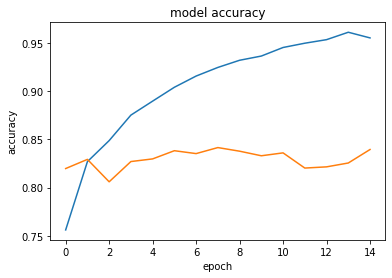

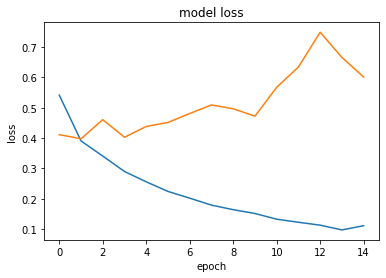

In [ ]:
from matplotlib import pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
#plt.plot(history.history['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.plot(history.history['test_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()




# RESNET 50 transfer learning without standrzation /0.734

In [ ]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model,load_model
#from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 2,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
#download model
import requests
#https://drive.google.com/uc?export=download&id=1n7rGZsAvwr6Le-IEHWBgA7ihz3pZA1DE
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)
    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)
    save_response_content(response, destination)    
def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value
    return None
def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
class_m=0   
plus=True               
file_id = '1n7rGZsAvwr6Le-IEHWBgA7ihz3pZA1DE'
destination = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
download_file_from_google_drive(file_id, destination)  


In [ ]:
#Load the pre-trained weights of the model
base_model.load_weights("/content/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)

In [ ]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fa2932da910> False
<keras.layers.convolutional.ZeroPadding2D object at 0x7fa2932da790> False
<keras.layers.convolutional.Conv2D object at 0x7fa2932b10d0> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa2932b1310> False
<keras.layers.core.activation.Activation object at 0x7fa293336190> False
<keras.layers.pooling.MaxPooling2D object at 0x7fa29334b250> False
<keras.layers.convolutional.Conv2D object at 0x7fa293266390> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa21f060cd0> False
<keras.layers.core.activation.Activation object at 0x7fa293275750> False
<keras.layers.convolutional.Conv2D object at 0x7fa29329bd90> False
<keras.layers.normalization.batch_normalization.BatchNormalization object at 0x7fa293275a50> False
<keras.layers.core.activation.Activation object at 0x7fa2932768d0> False
<keras.layers.convolutional.Conv2D object at 0x7fa29328c590> False
<keras

In [ ]:
datagen = ImageDataGenerator(rescale=1.0/255.0 )
# specify imagenet mean values for centering
# create data generator
# prepare iterators
train = datagen.flow_from_directory(input_path+'train/',class_mode="categorical", batch_size=18, target_size=(224, 224))
val = datagen.flow_from_directory(input_path+'val/',class_mode="categorical", batch_size=18, target_size=(224, 224))
test= datagen.flow_from_directory(input_path+'test/',class_mode="categorical", batch_size=16, target_size=(224, 224))

Found 15998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max',save_best_only=True)
history = model.fit_generator(train,validation_data=val,epochs=15,callbacks=[mc,es])

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


889/889 [==============================] - ETA: 0s - loss: 0.7037 - accuracy: 0.5867

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


889/889 [==============================] - 182s 201ms/step - loss: 0.7037 - accuracy: 0.5867 - val_loss: 0.6468 - val_accuracy: 0.6553
Epoch 2/15
889/889 [==============================] - 177s 199ms/step - loss: 0.6374 - accuracy: 0.6351 - val_loss: 0.6285 - val_accuracy: 0.6430
Epoch 3/15
889/889 [==============================] - 178s 201ms/step - loss: 0.6066 - accuracy: 0.6720 - val_loss: 0.6067 - val_accuracy: 0.6690
Epoch 4/15
889/889 [==============================] - 178s 200ms/step - loss: 0.5976 - accuracy: 0.6799 - val_loss: 0.5902 - val_accuracy: 0.6845
Epoch 5/15
889/889 [==============================] - 179s 201ms/step - loss: 0.5843 - accuracy: 0.6956 - val_loss: 0.5639 - val_accuracy: 0.7172
Epoch 6/15
889/889 [==============================] - 178s 200ms/step - loss: 0.5709 - accuracy: 0.7027 - val_loss: 0.5533 - val_accuracy: 0.7270
Epoch 7/15
889/889 [==============================] - 178s 200ms/step - loss: 0.5580 - accuracy: 0.7150 - val_loss: 0.5477 - val_accura

In [ ]:
model.load_weights("best_model.h5")
model.evaluate_generator(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.5361828207969666, 0.7341063618659973]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


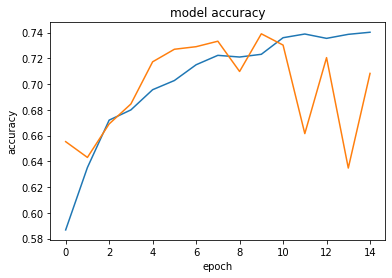

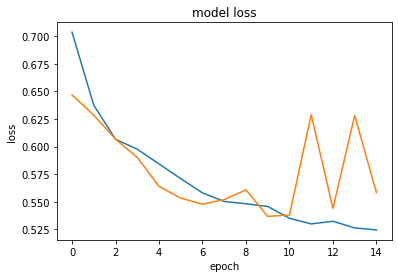

In [ ]:
from matplotlib import pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
#plt.plot(history.history['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.plot(history.history['test_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

# RESNET 50 load weights , transfer learning ...train all layers/ 0.938

In [ ]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model,load_model
#from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform

In [ ]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [ ]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [ ]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [ ]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [ ]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 2,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [ ]:
#download model
import requests
#https://drive.google.com/uc?export=download&id=1n7rGZsAvwr6Le-IEHWBgA7ihz3pZA1DE
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)
    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)
    save_response_content(response, destination)    
def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value
    return None
def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
class_m=0   
plus=True               
file_id = '1n7rGZsAvwr6Le-IEHWBgA7ihz3pZA1DE'
destination = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
download_file_from_google_drive(file_id, destination)  


In [ ]:
#Load the pre-trained weights of the model
base_model.load_weights("/content/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [ ]:
model = Model(inputs=base_model.input, outputs=headModel)

In [ ]:
datagen = ImageDataGenerator( featurewise_center=True,featurewise_std_normalization=True)
# specify imagenet mean values for centering
datagen.mean = [0.485*255, 0.456*255, 0.406*255]#[0.6318*255, 0.5199*255, 0.4509*255]   
datagen.std = 0.226*255
# create data generator
# prepare iterators
train = datagen.flow_from_directory(input_path+'train/',class_mode="categorical", batch_size=18, target_size=(224, 224))
val = datagen.flow_from_directory(input_path+'val/',class_mode="categorical", batch_size=18, target_size=(224, 224))
test= datagen.flow_from_directory(input_path+'test/',class_mode="categorical", batch_size=16, target_size=(224, 224))

Found 15998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max',save_best_only=True)
history = model.fit_generator(train,validation_data=val,epochs=15,callbacks=[mc,es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/15
889/889 [==============================] - ETA: 0s - loss: 0.4870 - accuracy: 0.7995

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


889/889 [==============================] - 485s 503ms/step - loss: 0.4870 - accuracy: 0.7995 - val_loss: 0.3955 - val_accuracy: 0.8420
Epoch 2/15
889/889 [==============================] - 444s 499ms/step - loss: 0.2308 - accuracy: 0.9065 - val_loss: 0.3123 - val_accuracy: 0.8982
Epoch 3/15
889/889 [==============================] - 440s 494ms/step - loss: 0.2172 - accuracy: 0.9107 - val_loss: 0.5888 - val_accuracy: 0.8012
Epoch 4/15
889/889 [==============================] - 444s 499ms/step - loss: 0.2201 - accuracy: 0.9104 - val_loss: 0.2367 - val_accuracy: 0.9085
Epoch 5/15
889/889 [==============================] - 444s 500ms/step - loss: 0.1525 - accuracy: 0.9386 - val_loss: 0.1956 - val_accuracy: 0.9342
Epoch 6/15
889/889 [==============================] - 436s 490ms/step - loss: 0.1390 - accuracy: 0.9462 - val_loss: 0.2653 - val_accuracy: 0.8903
Epoch 7/15
889/889 [==============================] - 436s 491ms/step - loss: 0.1884 - accuracy: 0.9279 - val_loss: 0.2800 - val_accura

In [ ]:
model.load_weights("best_model.h5")
model.evaluate_generator(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.1671431064605713, 0.9386245608329773]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


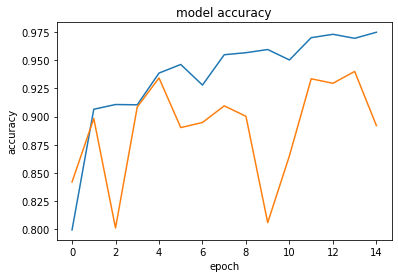

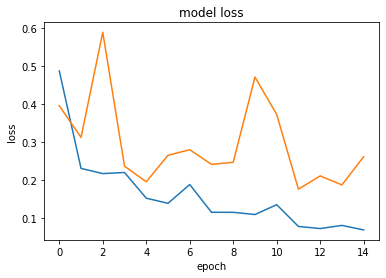

In [ ]:
from matplotlib import pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
#plt.plot(history.history['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.plot(history.history['test_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

# RESNET 50 load weights , transfer learning ...train all layers/ 25 epoch/0.948

In [14]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model,load_model
#from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform

In [15]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [16]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [17]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [18]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [19]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 2,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [20]:
#download model
import requests
#https://drive.google.com/uc?export=download&id=1n7rGZsAvwr6Le-IEHWBgA7ihz3pZA1DE
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)
    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)
    save_response_content(response, destination)    
def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value
    return None
def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
class_m=0   
plus=True               
file_id = '1n7rGZsAvwr6Le-IEHWBgA7ihz3pZA1DE'
destination = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
download_file_from_google_drive(file_id, destination)  


In [21]:
#Load the pre-trained weights of the model
base_model.load_weights("/content/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [22]:
model = Model(inputs=base_model.input, outputs=headModel)

In [23]:
datagen = ImageDataGenerator( featurewise_center=True,featurewise_std_normalization=True)
# specify imagenet mean values for centering
datagen.mean = [0.485*255, 0.456*255, 0.406*255]#[0.6318*255, 0.5199*255, 0.4509*255]   
datagen.std = 0.226*255
# create data generator
# prepare iterators
train = datagen.flow_from_directory(input_path+'train/',class_mode="categorical", batch_size=18, target_size=(224, 224))
val = datagen.flow_from_directory(input_path+'val/',class_mode="categorical", batch_size=18, target_size=(224, 224))
test= datagen.flow_from_directory(input_path+'test/',class_mode="categorical", batch_size=16, target_size=(224, 224))

Found 15998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.


In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max',save_best_only=True)
history = model.fit_generator(train,validation_data=val,epochs=25,callbacks=[mc,es])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/25
889/889 [==============================] - ETA: 0s - loss: 0.5740 - accuracy: 0.7425

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


889/889 [==============================] - 452s 490ms/step - loss: 0.5740 - accuracy: 0.7425 - val_loss: 0.9908 - val_accuracy: 0.7665
Epoch 2/25
889/889 [==============================] - 432s 486ms/step - loss: 0.2477 - accuracy: 0.8999 - val_loss: 0.2681 - val_accuracy: 0.8802
Epoch 3/25
889/889 [==============================] - 432s 486ms/step - loss: 0.1898 - accuracy: 0.9257 - val_loss: 2.5705 - val_accuracy: 0.5240
Epoch 4/25
889/889 [==============================] - 434s 488ms/step - loss: 0.1701 - accuracy: 0.9314 - val_loss: 0.2353 - val_accuracy: 0.9065
Epoch 5/25
889/889 [==============================] - 434s 488ms/step - loss: 0.1597 - accuracy: 0.9380 - val_loss: 0.1410 - val_accuracy: 0.9395
Epoch 6/25
889/889 [==============================] - 432s 486ms/step - loss: 0.1470 - accuracy: 0.9428 - val_loss: 0.1923 - val_accuracy: 0.9178
Epoch 7/25
889/889 [==============================] - 431s 485ms/step - loss: 0.1158 - accuracy: 0.9546 - val_loss: 0.2586 - val_accura

In [25]:
model.load_weights("best_model.h5")
model.evaluate_generator(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.17471514642238617, 0.9484206438064575]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


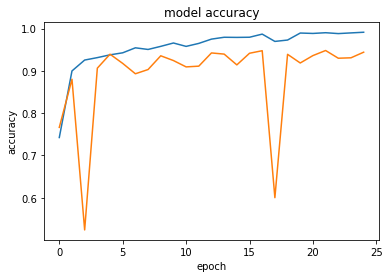

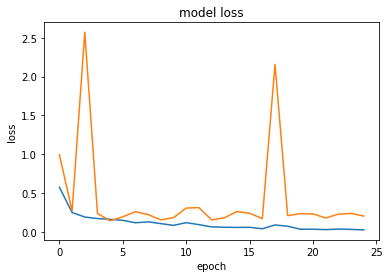

In [26]:
from matplotlib import pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
#plt.plot(history.history['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.plot(history.history['test_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

# RESNET 50 load weights , transfer learning ...train all layers/ more 3 dense layers in the end of model/0.940

In [27]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model,load_model
#from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform

In [28]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [29]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [30]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [31]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [37]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(64, activation='relu', name='fc21',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(64, activation='relu', name='fc22',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(32, activation='relu', name='fc23',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 2,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [38]:
#download model
import requests
#https://drive.google.com/uc?export=download&id=1n7rGZsAvwr6Le-IEHWBgA7ihz3pZA1DE
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)
    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)
    save_response_content(response, destination)    
def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value
    return None
def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
class_m=0   
plus=True               
file_id = '1n7rGZsAvwr6Le-IEHWBgA7ihz3pZA1DE'
destination = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
download_file_from_google_drive(file_id, destination)  


In [39]:
#Load the pre-trained weights of the model
base_model.load_weights("/content/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [40]:
model = Model(inputs=base_model.input, outputs=headModel)

In [41]:
datagen = ImageDataGenerator( featurewise_center=True,featurewise_std_normalization=True)
# specify imagenet mean values for centering
datagen.mean = [0.485*255, 0.456*255, 0.406*255]#[0.6318*255, 0.5199*255, 0.4509*255]   
datagen.std = 0.226*255
# create data generator
# prepare iterators
train = datagen.flow_from_directory(input_path+'train/',class_mode="categorical", batch_size=18, target_size=(224, 224))
val = datagen.flow_from_directory(input_path+'val/',class_mode="categorical", batch_size=18, target_size=(224, 224))
test= datagen.flow_from_directory(input_path+'test/',class_mode="categorical", batch_size=16, target_size=(224, 224))

Found 15998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.


In [42]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max',save_best_only=True)
history = model.fit_generator(train,validation_data=val,epochs=15,callbacks=[mc,es])

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


889/889 [==============================] - ETA: 0s - loss: 0.6409 - accuracy: 0.6397

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


889/889 [==============================] - 441s 488ms/step - loss: 0.6409 - accuracy: 0.6397 - val_loss: 0.8023 - val_accuracy: 0.6470
Epoch 2/15
889/889 [==============================] - 435s 489ms/step - loss: 0.4774 - accuracy: 0.7712 - val_loss: 0.5041 - val_accuracy: 0.7615
Epoch 3/15
889/889 [==============================] - 435s 489ms/step - loss: 0.2761 - accuracy: 0.8837 - val_loss: 0.3209 - val_accuracy: 0.8633
Epoch 4/15
889/889 [==============================] - 434s 488ms/step - loss: 0.2012 - accuracy: 0.9163 - val_loss: 0.3194 - val_accuracy: 0.8635
Epoch 5/15
889/889 [==============================] - 433s 487ms/step - loss: 0.1676 - accuracy: 0.9321 - val_loss: 0.1994 - val_accuracy: 0.9222
Epoch 6/15
889/889 [==============================] - 433s 487ms/step - loss: 0.1557 - accuracy: 0.9389 - val_loss: 0.4590 - val_accuracy: 0.8572
Epoch 7/15
889/889 [==============================] - 432s 486ms/step - loss: 0.1503 - accuracy: 0.9404 - val_loss: 0.3191 - val_accura

In [43]:
model.load_weights("best_model.h5")
model.evaluate_generator(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[0.17760474979877472, 0.940423846244812]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


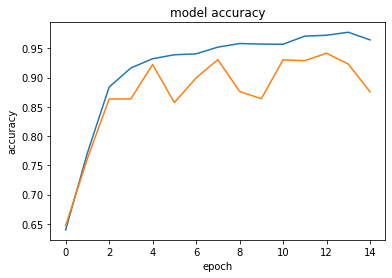

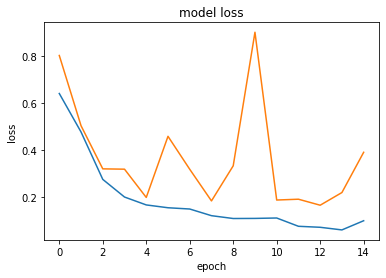

In [44]:
from matplotlib import pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
#plt.plot(history.history['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.plot(history.history['test_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

# RESNET 50 load weights , transfer learning ...train all layers/ increase lr to 0.1 from defult 0.001

In [45]:
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K
import tensorflow.keras
from tensorflow.keras.models import Sequential, Model,load_model
#from keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from google.colab.patches import cv2_imshow
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.initializers import glorot_uniform

In [46]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

In [47]:
def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)

    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1', kernel_initializer=glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

In [48]:
def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', kernel_initializer=glorot_uniform(seed=0))(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
    X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    
    model = Model(inputs=X_input, outputs=X, name='ResNet50')

    return model

In [49]:
base_model = ResNet50(input_shape=(224, 224, 3))

In [50]:
headModel = base_model.output
headModel = Flatten()(headModel)
headModel=Dense(256, activation='relu', name='fc1',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel=Dense(128, activation='relu', name='fc2',kernel_initializer=glorot_uniform(seed=0))(headModel)
headModel = Dense( 2,activation='softmax', name='fc3',kernel_initializer=glorot_uniform(seed=0))(headModel)

In [51]:
#download model
import requests
#https://drive.google.com/uc?export=download&id=1n7rGZsAvwr6Le-IEHWBgA7ihz3pZA1DE
def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)
    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)
    save_response_content(response, destination)    
def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value
    return None
def save_response_content(response, destination):
    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
class_m=0   
plus=True               
file_id = '1n7rGZsAvwr6Le-IEHWBgA7ihz3pZA1DE'
destination = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
download_file_from_google_drive(file_id, destination)  


In [52]:
#Load the pre-trained weights of the model
base_model.load_weights("/content/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")

In [53]:
model = Model(inputs=base_model.input, outputs=headModel)

In [54]:
datagen = ImageDataGenerator( featurewise_center=True,featurewise_std_normalization=True)
# specify imagenet mean values for centering
datagen.mean = [0.485*255, 0.456*255, 0.406*255]#[0.6318*255, 0.5199*255, 0.4509*255]   
datagen.std = 0.226*255
# create data generator
# prepare iterators
train = datagen.flow_from_directory(input_path+'train/',class_mode="categorical", batch_size=18, target_size=(224, 224))
val = datagen.flow_from_directory(input_path+'val/',class_mode="categorical", batch_size=18, target_size=(224, 224))
test= datagen.flow_from_directory(input_path+'test/',class_mode="categorical", batch_size=16, target_size=(224, 224))

Found 15998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.
Found 5002 images belonging to 2 classes.


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
es=EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max',save_best_only=True)
history = model.fit_generator(train,validation_data=val,epochs=15,callbacks=[mc,es])

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


889/889 [==============================] - ETA: 0s - loss: 109.1465 - accuracy: 0.4974

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


889/889 [==============================] - 429s 475ms/step - loss: 109.1465 - accuracy: 0.4974 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/15
889/889 [==============================] - 419s 471ms/step - loss: 0.6995 - accuracy: 0.4970 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 3/15
889/889 [==============================] - 417s 469ms/step - loss: 0.6974 - accuracy: 0.5011 - val_loss: 0.6975 - val_accuracy: 0.5000
Epoch 4/15
889/889 [==============================] - 418s 470ms/step - loss: 0.6991 - accuracy: 0.5086 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 5/15
889/889 [==============================] - 418s 470ms/step - loss: 0.6988 - accuracy: 0.4992 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 6/15
889/889 [==============================] - 418s 470ms/step - loss: 0.6993 - accuracy: 0.4996 - val_loss: 0.6956 - val_accuracy: 0.5000
Epoch 7/15
118/889 [==>...........................] - ETA: 5:32 - loss: 0.6968 - accuracy: 0.5217

In [ ]:
model.load_weights("best_model.h5")
model.evaluate_generator(test)

In [ ]:
from matplotlib import pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
#plt.plot(history.history['test_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
#plt.plot(history.history['test_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()